# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

In the deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


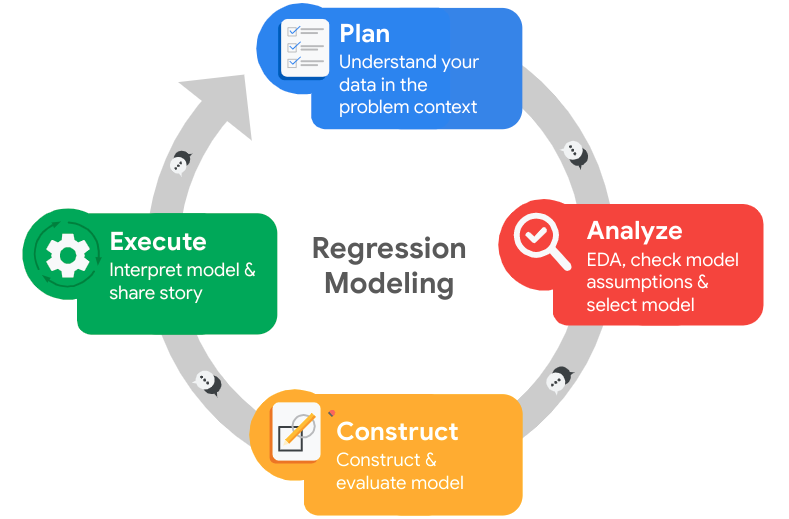

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




The Stakeholders of this project

- Salifort Management
- Salifort HR Department
- Development Team

Within this project, I am trying to predict employees tendency to leave based on satisfaction and other meaningful independent variables.

The data provided contain 15,000 rows and 10 columns that include categorical, numerical discrete and continuous variables.

The dataset, Python programming language with the data processing, analysis, modeling and visualization libraries, as well as the code pieces from the previously build models are helpful.

Since no pii or other sensitive information is provided in the dataset, there are no ethical considerations like GDPR, HIPAA or other regulations compliance, except possible bias.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [137]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [138]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [139]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [140]:
# Gather descriptive statistics about the data
df0.describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [141]:
# Display all column names
### YOUR CODE HERE ###
df0.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'Department', 'salary'],
      dtype=object)

In [144]:
# Renaming 'time_spend_company' to a shorter and fixing typo in 'average_montly_hours'
# Lowering the case in the columns' names

df0.columns = [x.lower() for x in df0.columns.values]
df0 = df0.rename(columns = {'time_spend_company':'tenure','average_montly_hours':'average_monthly_hours'})

# Display all column names after the update
df0.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'], dtype=object)

### Check missing values

Check for any missing values in the data.

In [145]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [146]:
# Check for duplicates
df0.duplicated().sum()

3008

In [147]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated() == True].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [148]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_new = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [149]:
print('The ratio of the True vs False observations in the target variable is about:', round((df0[df0.left == 1].shape[0]/df0.shape[0]),2)*100,'%')

The ratio of the True vs False observations in the target variable is about: 24.0 %


In [150]:
print('The number of employees left after # of years worked:\n',df0[df0.left == 1].groupby('tenure').left.sum())

The number of employees left after # of years worked:
 tenure
2      53
3    1586
4     890
5     833
6     209
Name: left, dtype: int64


### Check outliers

Check for outliers in the data.

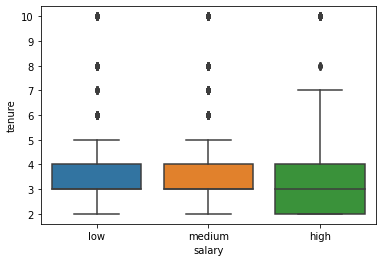

In [151]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

sns.boxplot(x = df_new.salary, y = df_new.tenure)
plt.show()


In [152]:
# Determine the number of rows containing outliers

QR1,QR3 = np.percentile(df_new.tenure.values,[25,75])
outliers = df_new.tenure.mean()+6*(QR3-QR1)
df_new[df_new.tenure > outliers]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
11078,0.69,0.88,3,164,10,0,0,0,management,medium
11124,0.29,0.75,6,271,10,0,0,0,sales,medium
11193,0.75,0.60,4,186,10,1,0,0,marketing,low
11194,0.61,0.89,3,242,10,0,0,0,sales,high
11195,0.47,0.79,3,284,10,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


In [154]:
### Introducing another subset with label encoding 'department' and 'salary' columns to calculate correlation

df_corr = df_new
dept = dict(zip(df_new.department.unique(),np.arange(0,len(df_new.department.unique()))))
sal = dict(zip(df_new.salary.unique(),np.arange(0,len(df_new.salary.unique()))))
df_corr['salary'] = df_corr['salary'].map(sal)
df_corr['department'] = df_corr['department'].map(dept)

In [155]:
df_corr.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [157]:
# Checking for multi-collinearity between independent variables:
df_col = sm.add_constant(df_corr)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_col.values, i) for i in range(df_col.shape[1])]
vif["features"] = df_col.columns
vif

,VIF Factor,features
0,44.844197,const
1,1.197335,satisfaction_level
2,1.146486,last_evaluation
3,1.229604,number_project
4,1.174517,average_monthly_hours
5,1.088189,tenure
6,1.017514,work_accident
7,1.207354,left
8,1.013938,promotion_last_5years
9,1.001205,department


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [158]:
# Get numbers of people who left vs. stayed
print(f'The number of people who stayed - 0 or left - 0:\n{df_new.left.value_counts()}')
# Get percentages of people who left vs. stayed
df_new[df_new.left == 1].shape[0]/df_new.shape[0]

The number of people who stayed - 0 or left - 0:
0    10000
1     1991
Name: left, dtype: int64


0.1660411975648403

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

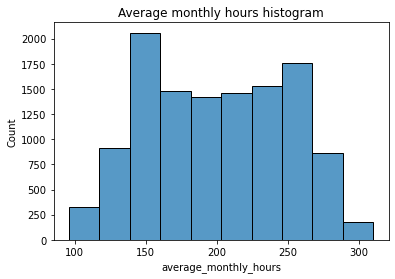

In [159]:
# Creating a histogram of the average monthly hours to assess their distribution
sns.histplot(data = df_new.average_monthly_hours, bins = 10)
plt.title('Average monthly hours histogram')
plt.show()

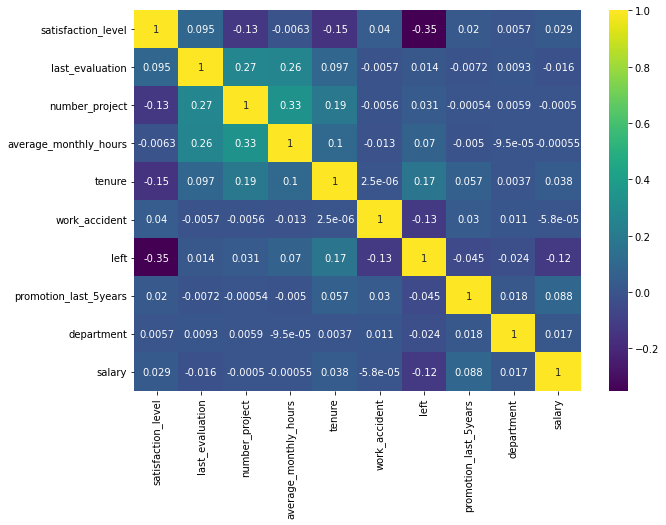

In [160]:
# Create a plot as needed
plt.figure(figsize = (10,7))
sns.heatmap(df_corr.corr(), cmap = 'viridis', annot = True)
plt.show()

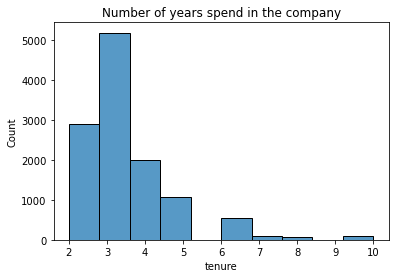

In [125]:
# Create a plot as needed
sns.histplot(data = df_new.tenure, bins = 10)
plt.title('Number of years spend in the company')
plt.show()

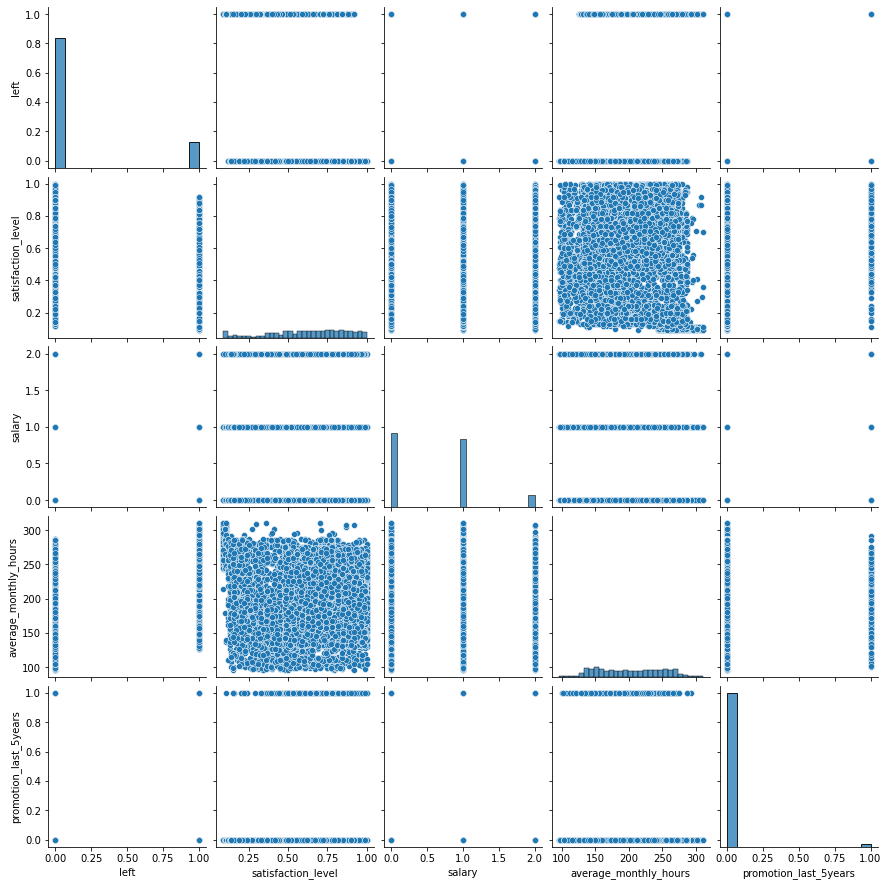

In [126]:
# Create a plot as needed
sns.pairplot(df_new[['left','satisfaction_level','salary','average_monthly_hours','promotion_last_5years']])
plt.show()

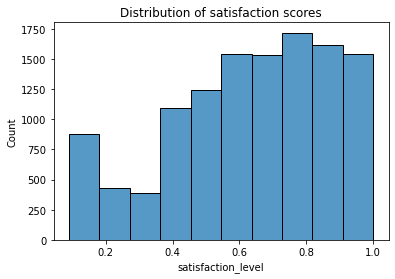

In [127]:
# Create a plot as needed
sns.histplot(data = df_new.satisfaction_level, bins = 10)
plt.title('Distribution of satisfaction scores')
plt.show()

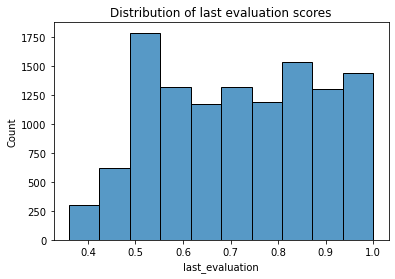

In [128]:
# Displaying the evaluation scores distribution

sns.histplot(data = df_new.last_evaluation, bins = 10)
plt.title('Distribution of last evaluation scores')
plt.show()

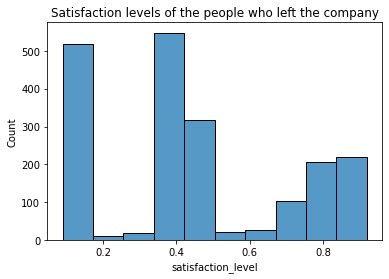

In [129]:
# Displaying the distribution of the satisfaction level for those who left

sns.histplot(data = df_new[df_new.left == 1].satisfaction_level, bins = 10)
plt.title('Satisfaction levels of the people who left the company')
plt.show()

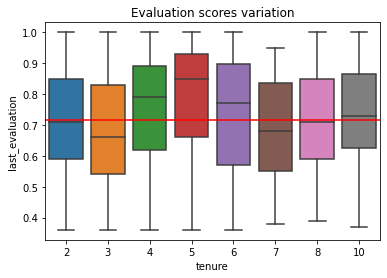

In [130]:
# Displaying the variation of evolution scores grouped by 'tenure'
sns.boxplot(y = df_new.last_evaluation, x = df_new.tenure)
plt.axhline(df_new.last_evaluation.mean(), color = 'r')
plt.title('Evaluation scores variation')
plt.show()

Mean satisfaction level by years worked in a company:
 tenure
2     0.699165
3     0.648988
4     0.516090
5     0.583183
6     0.571107
7     0.635957
8     0.665062
10    0.655327
Name: satisfaction_level, dtype: float64 
Mean satisfaction level by left or stayed:
 left
0    0.667365
1    0.440271
Name: satisfaction_level, dtype: float64


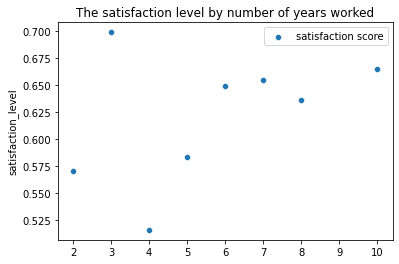

In [136]:
# Calculating mean values of satisfaction levels grouped by time worked in the company
mean_eval = df_new.groupby('tenure').satisfaction_level.mean()
mean_left = df_new.groupby('left').satisfaction_level.mean()
print('Mean satisfaction level by years worked in a company:\n',mean_eval, \
      '\nMean satisfaction level by left or stayed:\n',mean_left)

sns.scatterplot(df_new.tenure.unique(),mean_eval,label = 'satisfaction score')
plt.title('The satisfaction level by number of years worked')
plt.show()

In [132]:
print('The number of employees left after # of years worked:\n',df_new[df_new.left == 1].groupby('tenure').left.sum())

The number of employees left after # of years worked:
 tenure
2     31
3    874
4    495
5    482
6    109
Name: left, dtype: int64


In [161]:
y, X = df_new.left, df_new.drop('left', axis = 1)
# Create an OLS model.

model_OLS = ols(formula = 'left~satisfaction_level+C(salary)+tenure', data = df_new[['left','satisfaction_level','salary','tenure']])
# Fit the model.

model_OLS.fit()

# Save the results summary.

results = model_OLS.fit()

# Display the model results.

print(results.params)
results.summary()

Intercept             0.401022
C(salary)[T.1]       -0.054759
C(salary)[T.2]       -0.151800
satisfaction_level   -0.505968
tenure                0.035712
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   left   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     533.4
Date:                Wed, 08 Jan 2025   Prob (F-statistic):               0.00
Time:                        20:58:12   Log-Likelihood:                -4178.6
No. Observations:               11991   AIC:                             8367.
Df Residuals:                   11986   BIC:                             8404.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.4010      0.013     30.737      0.000       0.375       0.427
C(salary)[T.1]        -0.0548      0.007     -8.360      0.000      -0.068      -0.042
C(salary)[T.2]        -0.1518      0.012    -12.850      0.000      -0.175      -0.129
satisfaction_level    -0.5060      0.013    -38.465      0.000      -0.532      -0.480
tenure                 0.0357      0.002     14.976      0.000       0.031       0.040
==============================================================================
Omnibus:                     2373.430   Durbin-Watson:                   0.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4033.816
Skew:                           1.353   Prob(JB):                         0.00
Kurtosis:                       3.869   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 720x360 with 0 Axes>

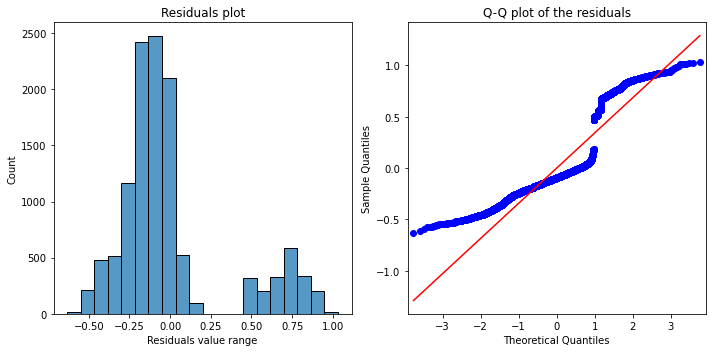

In [162]:
### Presenting Q-Q plot for the 

plt.figure(figsize = (10, 5))
f_plot,axes = plt.subplots(1,2,figsize = (10, 5))
predict = results.predict(X)
res = y - predict

sns.histplot(data = res, bins = 20, ax = axes[0])

# Set the x label of the residual plot.

axes[0].set_xlabel('Residuals value range')

# Set the title of the residual plot.

axes[0].set_title('Residuals plot')

# Create a Q-Q plot of the residuals.
sm.qqplot(res, line = 's', ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title('Q-Q plot of the residuals')
plt.tight_layout()
plt.show()

### Insights

Based on the high-level analysis of the dataset provided by info(), describe(), the first lines of the set and the posterior EDA, there are the following findings:

- The dataset provided does not have any ethical issues to deal with since salary is provided as a categorical value, no physical locations have been provided and no pii data are among the features.
- Since the number of observations corresponding to the left employees comprises less than a quarter (~24%) of the entire population, the dataset is considered imbalanced.
- There are no datetime values, which does not allow to calculate precise duration of employment. The set and contents of the features provided in the dataset does not make it reasonable for any feature engineering, like it would have make sense in case we dealt with the datetime fields to track possible seasonality.
- Looking at the dataset in general, most of the employees have satisfaction score > 0.5.
- The more in-depth EDA reveals that there is a moderate correlation of the target (dependent) variable with the 'last_evaluation_score' and 'salary'. Moreover, there is a stronger negative correlation with the satisfaction level, which proves the initial assumption taken from the initial data analysis that the lower satisfaction level corresponds to the higher probability of resignation.
- Another observation is that most of resignations/firing happened after 3 years of work, which is witnessed by the comparison of the mean satisfaction level values grouped by tenure, as well as the number of observations in 'left' grouped by 'tenure'. 
- It is interesting to note that there are no people left before 2 years and after 6 years of work in the company.
- The data with 'tenure' > 8 have been considered outliers.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



The Logistic regression cannot be selected for modeling based on the following considerations:
- the target variable 'left' is categorical, the observations are independent of each other;
- according to the variance_inflation_factor evaluation for possible multicollinearity, none of the variables is strongly collinear;
- the outliers have been dropped (especially that none of the 'left' = 1 correspond to the 'tenure' outlier points), 
- however, there is no normality of the reciduals distribution and no linear distribution of the inter-quantile distribution of the residuals.

Hence, it is decided to move forward with other prediction models like XGBoost.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify = y, random_state = 42)

rc = RandomForestClassifier(random_state=42)

cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [300]
             }
scoring = {'accuracy', 'precision', 'recall', 'f1'}

rfc = GridSearchCV(rc,
                      cv_params,
                      scoring = scoring,
                      cv = 4,
                      refit = 'f1'
                     )

rfc.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [180]:
rfc.best_score_

0.9500156373974886

In [181]:
y_pred = rfc.predict(X_test)

# Accuracy score
ac_score = metrics.accuracy_score(y_test, y_pred)
print('accuracy score:', ac_score)

#Precision score
pc_score = metrics.precision_score(y_test, y_pred)
print('precision score:', pc_score)

#Recall score
rc_score = metrics.recall_score(y_test, y_pred)
print('recall score:', rc_score)

#Recall score
f1_score = metrics.f1_score(y_test, y_pred)
print('f1 score:', f1_score)

accuracy score: 0.9862442684451855
precision score: 0.9866666666666667
recall score: 0.9296482412060302
f1 score: 0.9573091849935317


In [182]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

results = make_results('Random Forest Slassifier', rfc, 'f1')
results

,model,precision,recall,F1,accuracy
0,Random Forest Slassifier,0.983214,0.919017,0.950016,0.983945


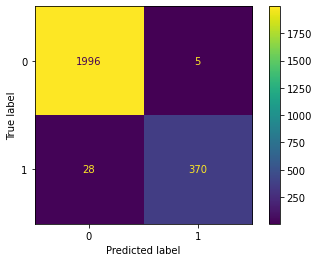

In [183]:
cm = confusion_matrix(y_test, y_pred, labels=rfc.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rfc.classes_, 
                             )
disp.plot(values_format='');

In [184]:
# Area under curve for receiver operating characteristic:
auc = roc_auc_score(y_test, y_pred)
auc

0.9635747452906712

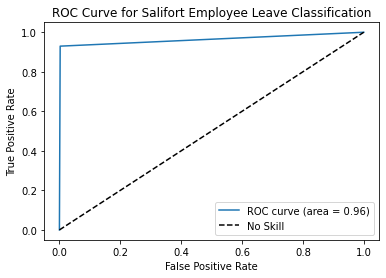

In [185]:
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred) 
# Plot the ROC curve
plt.figure()  
plt.plot(fp_rate, tp_rate, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Salifort Employee Leave Classification')
plt.legend()
plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






The best Random Forest Classificator model score is 95%, which makes it an acceptable for predicting the target variable in terms of reliability and accuracy.

Hence, it would be recommended to share the outcomes of the constructed model performance parameters demonstrating its prediction capabilities, create an app with the machine learning model implemented, and hand the app over to the Salifort HR business users to employ the model for evaluation of the new and other existing employees.

The HR should provide executive reports to the Management following implementation of any new measures/campaigns/programs aimed at the improvement of the employee satisfaction level. The new data features reflecting information about the information about the satisfaction improvement measures that may affect the model prediction.

Also, since the model confirmed good predictability in strong correlation with the satisfaction level, it is recommended for HR and the Management to focus on improvement of the corporate programs and the employee retention measures that contribute the most to the overall satisfaction score.

Finally, the Management should be recommended to consider further analysis by providing more features in the dataset that may also be influencial and important to the accurate prediction.

The model can further be improved by fine tuning the CV hyperparameters and introducing more meaningful (important) features. It is also recommended to compare the model with other classifiers like XGboost or LightGBM if the model training time is crucial. Additionally, one may consider balancing the dataset or train the models over rolling cross-sections (folds) of the dataset to make sure the predictions are unbiased and more reliable.

Since the model does not contain any pii data, nor any geographic locations, we may not have ethic and bias model considerations.

The questions that can be raised with the team are:

- How can the model parameters be interpreted to introduce the model to the business audience?
- What are the model limitations?
- how can we possibily improve further the dataset features?
- What other information may be requested from stakeholders to improve model performance?

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Before training and testing the model, the original dataset was split into traing and test subsets with the ratio of 80%/20%. The splitting also included stratification on the predicted variable.

- the acuracy score (total number of accurately predicted values) is 98.64%,
#### <h3 style="text-align: center;">
$$
accuracy = \frac{True Positives + True Negatives}{TotalObservations}
$$ </h3>

- the precision score, which represents the ratio of true positives to the sum of true positives and false positives, is 98.67%,
#### <h3 style="text-align: center;">
$$
precision = \frac{True Positives}{True Positives + False Positives}
$$
 </h3>

- the recall score is 92.9%,
#### <h3 style="text-align: center;">
$$
recall = \frac{True Positives}{True Positives + False Negatives}
$$ </h3>

- and the f1 score combining precision and recall 95.73%: 
#### <h3 style="text-align: center;">
$$
F_1 = 2\frac{precision \times recall}{precision + recall}
$$ </h3>

However, it is important to note that the dataset was imbalanced, and the major portion (>75%) of the dataset is represented by the employees who stay in the company that may make the model biased to those with the company.

Still, the model's true negative values, describing the employees who left, have been accuraterly predicted based on the test feature subset, and the predictoins that are Type II error comprise less than 1%. The Type I errors represent <1% of the model predictions as well. Again, since Salifort HR is interested in most accurate prediction of those who may leave the company, so reducing Type I errors (those who predicted as stayed but actually left) is crucial.

The model seems to have been built on the correctly selected features as part of the EDA feature engineering process.

### Conclusion, Recommendations, Next Steps

The above model has been trained on the imbalanced dataset, so it is highly recommended to perform stratified data sampling and evaluate the model performance over each of them.

It is also recommended to evaluate feature importance. It will be important to ask domain experts why they believe this feature scores so highly in this model.

In addition, application of the RCS (rolling cross-sections), or folds, dataset splitting technique may be useful for balancing and iterative training of the model.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.